## Seattle Airbnb Open Data Analysis
    
    The Seattle AirBnB Dataset contains data about AirBnB listings in Seattle, calendar availability for each of these listings as well as user reviews on the listings. Using this dataset, I am going to attempt to answer the business questions below using a CRISP-DM Process.
    
### CRISP-DM 
 1. Business Understanding 
 2. Data Understanding 
 3. Prepare Data 
 4. Data Modeling
 5. Evaluate the Results
 
### Business Questions    

#### Pricing Trends:
  When and where to stay:
  1. What are the most popular booked property types in Seattle?
  2. What are the peak booking months in Seattle?
  3. What are the most and least popular locations to book based on price?

#### Airbnb review sentiments in Seattle:
 .4. What are the most and least popular locations to book based on Reviews?
    
#### Price Prediction:
 .5. What factors of the listing correlate best for predicting price?

## Importing and looking at the data. 



In [86]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [87]:
pwd

'C:\\Users\\humbertitob98\\Desktop\\Education\\Udacity 2021'

 ### 2. Data Understanding 
     Below I set up the dataframes to see our data is Calendar and prices, Listing information, and Reviews


In [88]:
df_calendar = pd.read_csv('C:\\Users\\humbertitob98\\Desktop\\Education\\Udacity 2021\\calendar.csv')
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [89]:
# listings data set
df_listings = pd.read_csv('C:\\Users\\humbertitob98\\Desktop\\Education\\Udacity 2021\\listings.csv')
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [90]:
# review data set
df_reviews = pd.read_csv('C:\\Users\\humbertitob98\\Desktop\\Education\\Udacity 2021\\reviews.csv')
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


 ### 3. Prepare Data
     Below I am preparing the Calendar, Listings and Reviews Data Sets. Through this preperation we see our findings. 

## CALENDAR Data Set

In the Calendar data set I am preparing the data to show the numbers of rows and columns in dataset, showing columns with the missing values and columns that have no missing values. I also describe the dataset to see features about each column. 


In [91]:
###calendar dataset
###Number of rows and columns
###Number of missing values for price
print('Number of rows and columns:',df_calendar.shape)
print()

print('Percentage of Missing values:',(df_calendar.isnull().sum()/len(df_calendar))*100)
print()

print(df_calendar.describe(include='all'))

Number of rows and columns: (1393570, 4)

Percentage of Missing values: listing_id     0.000000
date           0.000000
available      0.000000
price         32.938998
dtype: float64

          listing_id        date available    price
count   1.393570e+06     1393570   1393570   934542
unique           NaN         365         2      669
top              NaN  2016-02-29         t  $150.00
freq             NaN        3818    934542    36646
mean    5.550111e+06         NaN       NaN      NaN
std     2.962274e+06         NaN       NaN      NaN
min     3.335000e+03         NaN       NaN      NaN
25%     3.258213e+06         NaN       NaN      NaN
50%     6.118244e+06         NaN       NaN      NaN
75%     8.035212e+06         NaN       NaN      NaN
max     1.034016e+07         NaN       NaN      NaN


#### FINDINGS
there will be little data prep required to use the calendar dataset. Looks like only the the price column is missing values, it might just  be because listing is not available for those days.

### LISTINGS Data Set

In the Calendar data set I am preparing the data to show the Number of rows and columns in the dataset, Columns with missing values and columns that have no missing values, I am describing the dataset to see features about each column, and I explore some of the categorical features.

In [92]:
# Print rows and columns in calendar data set
print("Number of rows and columns: ", df_listings.shape)

print(df_listings.isnull().sum())

Number of rows and columns:  (3818, 92)
id                                     0
listing_url                            0
scrape_id                              0
last_scraped                           0
name                                   0
summary                              177
space                                569
description                            0
experiences_offered                    0
neighborhood_overview               1032
notes                               1606
transit                              934
thumbnail_url                        320
medium_url                           320
picture_url                            0
xl_picture_url                       320
host_id                                0
host_url                               0
host_name                              2
host_since                             2
host_location                          8
host_about                           859
host_response_time                   523
host_response_rat

In [93]:
# Describe
print(df_listings.describe(include='all'))

                  id                           listing_url     scrape_id  \
count   3.818000e+03                                  3818  3.818000e+03   
unique           NaN                                  3818           NaN   
top              NaN  https://www.airbnb.com/rooms/8193241           NaN   
freq             NaN                                     1           NaN   
mean    5.550111e+06                                   NaN  2.016010e+13   
std     2.962660e+06                                   NaN  0.000000e+00   
min     3.335000e+03                                   NaN  2.016010e+13   
25%     3.258256e+06                                   NaN  2.016010e+13   
50%     6.118244e+06                                   NaN  2.016010e+13   
75%     8.035127e+06                                   NaN  2.016010e+13   
max     1.034016e+07                                   NaN  2.016010e+13   

       last_scraped                    name  \
count          3818                    3

In [94]:
# Exlporing categorical features: experiences_offered
print('Value counts for experiences_offered: ', df_listings['experiences_offered'].value_counts())

Value counts for experiences_offered:  none    3818
Name: experiences_offered, dtype: int64


In [95]:
# Exlporing categorical features: host_location
print('Value counts for host_location: ', df_listings['host_location'].value_counts())

Value counts for host_location:  Seattle, Washington, United States                                    3259
US                                                                     246
Spokane, Washington, United States                                      41
Kent, Washington, United States                                         34
Los Angeles, California, United States                                  13
Bellevue, Washington, United States                                     12
San Francisco, California, United States                                11
Mercer Island, Washington, United States                                10
Kirkland, Washington, United States                                      8
New York, New York, United States                                        6
Sammamish, Washington, United States                                     5
Vashon, Washington, United States                                        5
Seattle                                                            

###  4. Data Modeling
    I begin to model our graphs to get be able to get visual graphical insight. 
    


### FINDINGS
There are no experiences offered for all rows. The host_location column needs to be standardized so we can better utilize it for analysis. 
For example: "Seattle, Washington, United States", "Seattle" and "Seattle, Washington" should be considered as the same.

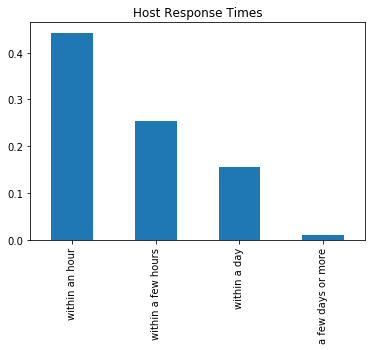

In [96]:
#host_response_time
host_response_vals = df_listings['host_response_time'].value_counts()
(host_response_vals/df_listings.shape[0]).plot(kind="bar");
plt.title("Host Response Times");

### FINDINGS
Most hosts respond within an hour and it's a down from there. 

### REVIEWS Data Set

1. Number of rows and columns in the dataset
2. Columns with missing values and columns that have no missing values
3. Describe the dataset to see features about each column

In [99]:
# Print rows and columns in reviews data set then assess null values and describe
print("Number of rows and columns: ", df_reviews.shape)

print(df_reviews.isnull().sum())

print(df_reviews.describe(include='all'))

Number of rows and columns:  (84849, 6)
listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         17
dtype: int64
          listing_id            id        date   reviewer_id reviewer_name  \
count   8.484900e+04  8.484900e+04       84849  8.484900e+04         84849   
unique           NaN           NaN        1930           NaN         14380   
top              NaN           NaN  2015-09-21           NaN         David   
freq             NaN           NaN         580           NaN           870   
mean    3.005067e+06  3.058765e+07         NaN  1.701301e+07           NaN   
std     2.472877e+06  1.636613e+07         NaN  1.353704e+07           NaN   
min     4.291000e+03  3.721000e+03         NaN  1.500000e+01           NaN   
25%     7.946330e+05  1.725127e+07         NaN  5.053141e+06           NaN   
50%     2.488228e+06  3.228809e+07         NaN  1.413476e+07           NaN   
75%     4.694479e+06  4.457648e+07         NaN 

### Pricing Trends 
    When and Where to Book
  1. What are the peak booking months in Seattle?
  2. What are the most and least popular locations to book based on price?
  3. What are the most and least popular locations to book based on reviews?  

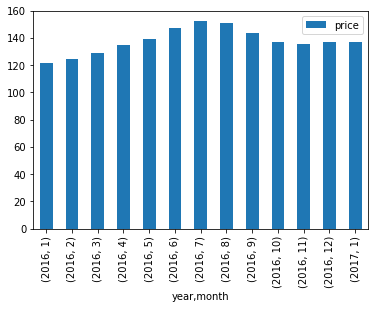

In [100]:
# Q1 Plot the average price by month 
df_calendar['year'] = pd.DatetimeIndex(df_calendar['date']).year
df_calendar['month'] = pd.DatetimeIndex(df_calendar['date']).month

# for average price, we will be converting to float and removing the $ sign
df_calendar['price'] = df_calendar['price'].replace('[\$,]', '', regex=True).astype(float)

df_calendar.groupby(['year','month'])[['price']].mean().plot(kind="bar");

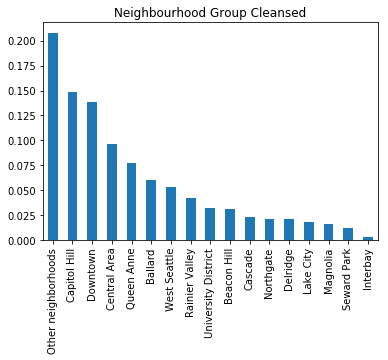

In [97]:
# neighborhood_group_cleansed
neigh_vals = df_listings['neighbourhood_group_cleansed'].value_counts()
(neigh_vals/df_listings.shape[0]).plot(kind="bar");
plt.title("Neighbourhood Group Cleansed");

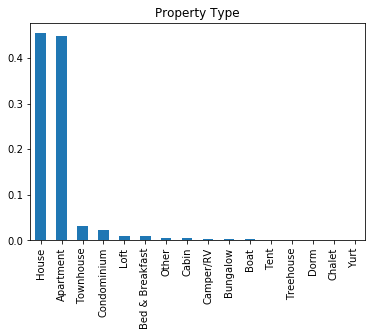

In [98]:
# property_type
prop_vals = df_listings['property_type'].value_counts()
(prop_vals/df_listings.shape[0]).plot(kind="bar");
plt.title("Property Type");

### FINDINGS
In the graph above June through August are the peak months, with July being the highest. We also see the most popular neighborhoods and that houses and apartments are most popular.

The year starts out slow, with January having the lowest average price. In Spring and the holiday season, prices start to pick back up a little around Apr/May and Nov/Dec.

                                price
neighbourhood_cleansed               
Southeast Magnolia         231.705882
Portage Bay                227.857143
Westlake                   194.470588
West Queen Anne            187.769231
Montlake                   182.789474
Briarcliff                 176.571429
Sunset Hill                176.055556
Industrial District        173.333333
Alki                       171.619048
Windermere                 169.900000
Pioneer Square             169.260870
Central Business District  164.213592
Fauntleroy                 164.100000
Belltown                   162.893162
East Queen Anne            159.414634
Madrona                    158.234043
Pike-Market                157.785714
North Queen Anne           150.240741
Green Lake                 149.018519
Lawton Park                147.566667
Holly Park                 147.166667
North Admiral              146.408163
View Ridge                 139.000000
Lower Queen Anne           138.202128
First Hill  

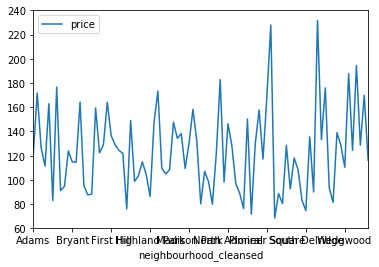

In [101]:
# Plot the average price by neighborhood

# In order to average price, we will be converting it to float and removing the $ sign
df_listings['price'] = df_listings['price'].replace('[\$,]', '', regex=True).astype(float)

print(df_listings.groupby(['neighbourhood_cleansed'])[['price']].mean().sort_values(by='price',ascending=False))
df_listings.groupby(['neighbourhood_cleansed'])[['price']].mean().plot();

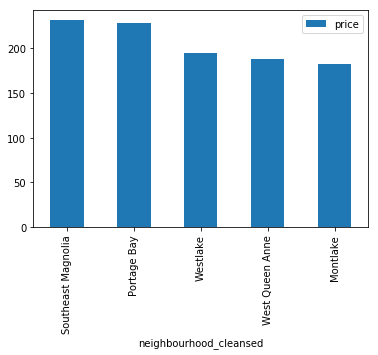

In [102]:
# Q2 Plot top 10 neighborhoods
top10_neigh = df_listings.groupby(['neighbourhood_cleansed'])[['price']].mean().sort_values(by='price',ascending=False).head()
top10_neigh.plot(kind='bar');

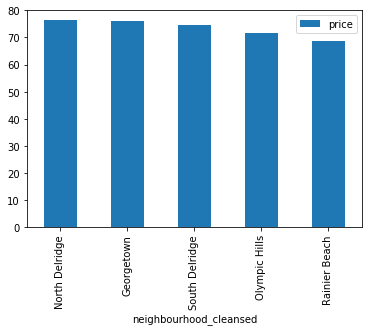

In [103]:
# Q3 Plot bottom 10 neighborhoods
bottom10_neigh = df_listings.groupby(['neighbourhood_cleansed'])[['price']].mean().sort_values(by='price',ascending=False).tail()
bottom10_neigh.plot(kind='bar');

### FINDINGS
There are definitely price fluctuations based on neighborhoods. The Southeast Magnolia neighborhood is the priciest of all, averaging at $231.

Portage Bay is 2nd at $227.

Rainier Beach is cheapest at $68 average price.

### Question 2 -  Airbnb review sentiments in Seattle
    Here I ask What are the most and least popular locations to book based on Reviews focusing on the top 5.

In [104]:
# Explore property types within neighborhoods and how they impact price
# Focus on the top 5 expensive Neighborhoods
# Focus on property types - House and Apartment

values_keep_neigh = ('Southeast Magnolia','Portage Bay','Westlake','West Queen Anne','Montlake')
values_keep_prop = ('Apartment','House')
df_listings_pruned1 = df_listings.loc[df_listings['neighbourhood_cleansed'].isin(values_keep_neigh)]
df_listings_pruned2 = df_listings_pruned1.loc[df_listings['property_type'].isin(values_keep_prop)]

df_neigh_prop = df_listings_pruned2.groupby(['neighbourhood_cleansed','property_type'])[['price']].mean().reset_index()
df_neigh_prop

,neighbourhood_cleansed,property_type,price
0,Montlake,Apartment,133.333333
1,Montlake,House,191.533333
2,Portage Bay,Apartment,113.833333
3,Portage Bay,House,340.285714
4,Southeast Magnolia,Apartment,219.600000
5,Southeast Magnolia,House,234.100000
6,West Queen Anne,Apartment,128.208333
7,West Queen Anne,House,247.393939
8,Westlake,Apartment,142.400000
9,Westlake,House,168.000000


In [105]:
price_arr = df_neigh_prop['price'].values
price_arr = np.reshape(price_arr, (5,2))
price_arr.shape

(5, 2)

In [106]:
# q2 Create a smaller data frame with just listing ids and review comments
df_comments = df_reviews[['listing_id', 'comments']].copy()
df_comments.head()

,listing_id,comments
0,7202016,Cute and cozy place. Perfect location to every...
1,7202016,Kelly has a great room in a very central locat...
2,7202016,"Very spacious apartment, and in a great neighb..."
3,7202016,Close to Seattle Center and all it has to offe...
4,7202016,Kelly was a great host and very accommodating ...


In [107]:
# Function to take a listing id and pass back the neighbourhood_cleansed field from the listings data set
def get_neighborhood(listing_id):
    '''
    Function to take a listing id and pass back the neighbourhood_cleansed field from the listings data set
    INPUT:
    listing_id - listing_id field for a particular listing
    OUTPUT:
    neighbourhood - the neighbourhood_cleansed field associated with a particular listing_id
    
    Helps to map each listing_id to it's respective neighbourhood in order to associate reviews with neighbourhoods
    '''
    neighbourhood = df_listings.loc[df_listings['id'] == listing_id, 'neighbourhood_cleansed'].iloc[0]
    return neighbourhood

# Test function
get_neighborhood(7421966)

'West Queen Anne'

In [ ]:
# Apply get_neighborhood function to the listing ids
df_comments['neighbourhood'] = df_comments['listing_id'].apply(get_neighborhood)
df_comments.head()

,listing_id,comments,neighbourhood
0,7202016,Cute and cozy place. Perfect location to every...,Lower Queen Anne
1,7202016,Kelly has a great room in a very central locat...,Lower Queen Anne
2,7202016,"Very spacious apartment, and in a great neighb...",Lower Queen Anne
3,7202016,Close to Seattle Center and all it has to offe...,Lower Queen Anne
4,7202016,Kelly was a great host and very accommodating ...,Lower Queen Anne


In [ ]:
#https://medium.com/analytics-vidhya/simplifying-social-media-sentiment-analysis-using-vader-in-python-f9e6ec6fc52f

analyser = SentimentIntensityAnalyzer()

def sentiment_analyzer_scores(sentence):
    '''
    Function to run sentiment intensity analyzer on a sentence and return compound polarity score
    INPUT:
    sentence - the text of the review comments 
    OUTPUT:
    score['compound'] - the compound score combining the positive, negative and neutral scores
    
    Provides the compound score for a particular sentence for sentiment analysis
    '''
    sentence = str(sentence)
    score = analyser.polarity_scores(sentence)
    return score['compound']


df_comments['polarity_score'] = df_comments['comments'].apply(sentiment_analyzer_scores)
df_comments.head()

In [ ]:
# Print number of positive, negative and neutral compound polarity scores
print('Positive compound scores: ',df_comments['polarity_score'][df_comments['polarity_score'] > 0].count())
print('Negative compound scores: ',df_comments['polarity_score'][df_comments['polarity_score'] < 0].count())
print('Neutral compound scores: ',df_comments['polarity_score'][df_comments['polarity_score'] == 0].count())

Positive compound scores:  82455
Negative compound scores:  838
Neutral compound scores:  1556


In [ ]:
# Group by neighbourhood and average the polarity scores
neigh_polarity = df_comments.groupby('neighbourhood')[['polarity_score']].mean().sort_values(by='polarity_score',ascending=False)

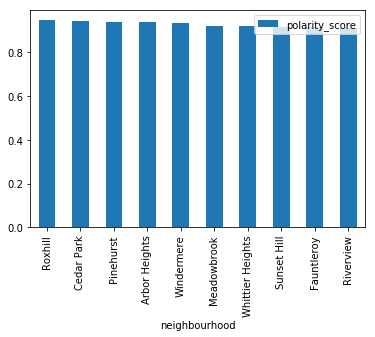

In [ ]:
# Q4 Visualize top neighborhoods based on reviews
neigh_polarity.head(10).plot(kind='bar');

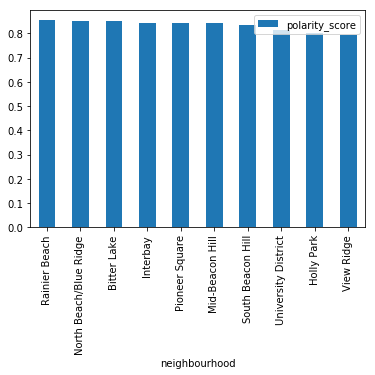

In [ ]:
# Q4 Visualize bottom 10 neighborhoods based on reviews
neigh_polarity.tail(10).plot(kind='bar');

### FINDINGS
In the graphs above we see that Roxhill, Cedar Park and Pinehurst have the top reviews. The lower ranking neighborhoods are University District, Holly Park and View Ridge

### Question 3 - PRICE PREDICTION
1. What factors correlate well to predicting price?

In [ ]:
# q3 Check if price has missing values, if it does, we want to remove those records from the dataset
df_listings['price'].isnull().sum()

0

In [ ]:
df_listings.shape


(3818, 92)

In [ ]:
# Drop columns that are less likely to have an impact on price
df_list = df_listings.copy()
cols_less_impact = ['id','listing_url','scrape_id','last_scraped','thumbnail_url','medium_url','xl_picture_url','host_id','host_url','host_thumbnail_url','host_verifications','street','neighbourhood','neighbourhood_group_cleansed','zipcode','smart_location','country','latitude','longitude','weekly_price','monthly_price','calendar_updated','calendar_last_scraped','first_review','last_review','calculated_host_listings_count','reviews_per_month','license']
df_list = df_list.drop(cols_less_impact, axis=1)
df_list.shape

(3818, 64)

In [ ]:
num_cols = df_list.select_dtypes(include=['float', 'int']).columns
for col in num_cols:
    print(col,df_list[col].isnull().sum())

host_listings_count 2
host_total_listings_count 2
bathrooms 16
bedrooms 6
beds 1
square_feet 3721
price 0
review_scores_rating 647
review_scores_accuracy 658
review_scores_cleanliness 653
review_scores_checkin 658
review_scores_communication 651
review_scores_location 655
review_scores_value 656


### FINDINGS
These categories below have the highest impacts on price

bathrooms - There are 16 rows with Nan for bathrooms. 

bedrooms - all the rows with blank bedroom field have beds value of at least 1.

beds - For the 1 record that have beds as Nan, bed_type is specified as Real Bed, 

square_feet - majority of field is Nan, I am dropping this column

host_listings_count and host_total_listings_count - There are only 2 rows with no values. 

###  5. Evaluate the Results
    I also include the results to the analysis in the "FINDINGS" cells. 
    
#### Pricing Trends:
    When and where to stay:
    What are the most popular booked property types in Seattle? Houses and Apartments
    What are the peak booking months in Seattle?  June through August
    What are the most and least popular locations to book based on price?  Most popular South east magnolia and Portage bay. Least popular is Olympic Bay and Ranier Beach

#### Airbnb review sentiments in Seattle:
    What are the most and least popular locations to book based on Reviews? Most popular are Roxhill and Cedar Park, Least popular are holly park and view ridge

#### Price Prediction:
    What factors of the listing correlate best for predicting price? In my observation it would be Bedrooms, bathrooms, bed and host listings count 
    
    